In [15]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [16]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [17]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [18]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [19]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(
    engine,
    reflect=True
)

In [20]:
# View all of the classes that automap found

classes = Base.metadata.tables
columns = classes.values()
for clase in classes:
    print(clase + ":")
print(columns)

measurement:
station:
dict_values([Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None), Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)])


In [21]:
# Save references to each table

from sqlalchemy import Table, Column, INTEGER, MetaData, TEXT, FLOAT

measurement = Table('measurement', MetaData(),
                    Column(
                        'id',
                        INTEGER(),
                        primary_key=True,
                        nullable=False
                    ),
                    Column(
                        'station',
                        TEXT()
                    ),
                    Column(
                        'date',
                        TEXT()
                    ),
                    Column(
                        'prcp',
                        FLOAT()
                    ),
                    Column(
                        'tobs',
                        FLOAT()
                    ),
              schema=None)
station = Table('station', MetaData(),
                Column(
                    'id',
                    INTEGER(),
                    primary_key=True,
                    nullable=False
                ),
                Column(
                    'station',
                    TEXT()),
                Column(
                    'name',
                    TEXT()
                ),
                Column(
                    'latitude',
                    FLOAT()
                ),
                Column(
                    'longitude',
                    FLOAT()
                ),
                Column(
                    'elevation',
                    FLOAT()
                ),
          schema=None)

print(measurement.columns)
print(station.columns)

['measurement.id', 'measurement.station', 'measurement.date', 'measurement.prcp', 'measurement.tobs']
['station.id', 'station.station', 'station.name', 'station.latitude', 'station.longitude', 'station.elevation']


In [22]:
# Create our session (link) from Python to the DB

session = Session(engine)

print(session)

## Bonus Challenge Assignment: Temperature Analysis II

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.columns.tobs), func.avg(measurement.columns.tobs), func.max(measurement.columns.tobs)).\
        filter(measurement.columns.date >= start_date).filter(measurement.columns.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [24]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax
# for a year in the data set

print(calc_temps('2012-06-29', '2012-06-29'))

[(71.0, 73.88888888888889, 79.0)]


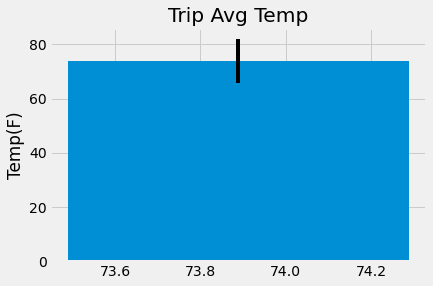

In [25]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
data = calc_temps('2012-06-29', '2012-06-29')
plt.bar(data[0][1], data[0][1],  yerr = data[0][2] - data[0][0])
plt.title("Trip Avg Temp")
plt.ylabel("Temp(F)")
plt.show()


### Daily Rainfall Average

In [27]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's

# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


In [ ]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()

# For example
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates


# Strip off the year and save a list of strings in the format %m-%d


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`

## Close Session